<a href="https://colab.research.google.com/github/gggggeun/study/blob/main/5.%20%EB%94%A5%EB%9F%AC%EB%8B%9D(deep%20learning)/Tensor_Operation(%ED%85%90%EC%84%9C%EC%97%B0%EC%82%B0%EA%B8%B0%EC%B4%88%EA%B3%B5%EB%B6%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[케라스 창시자에게 배우는 딥러닝] 참고

# Tensor Operation (텐서 연산)

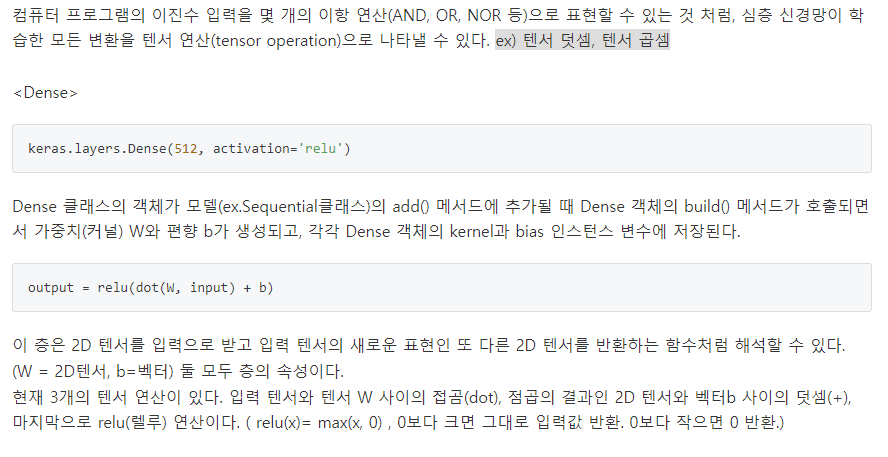

## 1. 원소별 연산 (element-wise operation)

원소별 연산은 텐서에 있는 각 원소에 독립적으로 적용된다. 이 말은 고도의 병렬 구현(1970-1990년대 슈퍼컴퓨터의 구조인 벡터프로세서(vector processor)에서 온 용어인 벡터화된 구현을 말한다)이 가능한 연산이라는 의미이다.



파이썬으로 단순한 원소별 연산을 구현한다면 relu 연산이나 덧셈,뺄셈 등의 연산 구현처럼 for 반복문을 사용할 것이다.

In [ ]:
# relu 연산 구현

def naive_relu(x):
  assert len(x.shape) == 2  #x는 2D 넘파이 배열이다.

  x = x.copy()  #입력 텐서 자체를 바꾸지 않도록 복사
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] = max(x[i,j], 0)
  return x

In [ ]:
# 덧셈의 연산 구현
def naive_add(x, y):
  assert len(x.shape) ==2  #x,y는 2D 넘파이 배열이다.
  assert x.shape == y.shape

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[i,j]
  return x

또한, 넘파이 배열을 다룰 때는 넘파이 내장 함수를 사용해 연산들을 처리 할 수 있다.

In [ ]:
# numpy 
import numpy as np

z = x + y  #원소별 덧셈
z = np.maximum(z, 0.)  #원소별 relu함수

## 2. 브로드캐스팅 (Broadcasting)

앞에서 구현한 naive_add 덧셈 함수는 동일한 크기의 2D 텐서만 지원한다. 하지만 Dense 층에는 2D 텐서와 벡터를 더했다. 크기가 다른 두 텐서가 더해질 때 무슨 일이 일어날까?



실행 가능하다면 작은 텐서가 큰 텐서의 크기에 맞추어 broadcasting 된다.

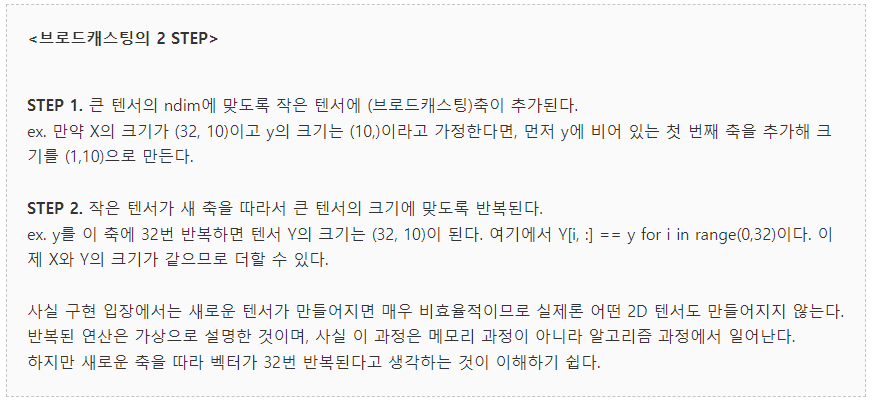

In [ ]:
# 크기가 다른 두 텐서 덧셈하기
def naive_add_matrix_and_vector(x,y):
  assert len(x.shape) == 2   # x=2D 넘파이 배열
  assert len(y.shape) == 1   # y=1D 넘파이 벡터
  assert x.shape[1] == y.shape[0]  # x의 두번째 차원과 y의 첫 번째 차원이 같아야 함.

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[j]
  return x

In [ ]:
# 크기가 다른 두 텐서에 브로드캐스팅으로 원소별 maximum 연산을 적용. numpy
import numpy as np

x = np.random.random((64, 3, 32, 10))  # x는 (64, 3, 32, 10)크기의 랜덤 텐서이다.
y = np.random.random((32, 10))  # y는 (32, 10)크기의 랜덤 텐서이다.

z = np.maximum(x,y)  # 출력z 크기는 x와 동일하게 (64, 3, 32, 10)이다.

## 3. 텐서 점곱 (Tensor dot operation)

텐서 곱셈(tensor product) 라고도 부르는 점곱 연산은 가장 널리 사용되고 유용한 텐서 연산이다.

원소별 연산과 반대로 입력 텐서의 원소들을 결합시킨다.



넘파이, 케라스, 씨아노, 텐서플로에서 원소별 곱셈은 * 연산자를 사용한다.

텐서플로에서는 matmul 연산자 또는 @를 사용하고 넘파이와 케라스는 보편적으로 dot 연산자를 사용한다.

- tensorflow : tf.matmul(x,y) or x@y(파이썬 3.5이상)
- keras : from keras import backend as K; K.dot(x,y)

두 벡터의 점곱은 스칼라가 되므로 원소 개수가 같은 벡터끼리 점곱이 가능하다.

In [ ]:
# 크기가 같은 두 벡터의 점곱 연산
def naive_vector_dot(x,y):
  assert len(x.shape) == 1   # x=1D 넘파이 벡터
  assert len(y.shape) == 1   # y=1D 넘파이 벡터
  assert x.shape[0] == y.shape[0]

  z = 0
  for i in range(x.shape[0]):      
    z += x[i] * y[i]
  return z

In [ ]:
# numpy 텐서 점곱
import numpy as np

z = np.dot(x,y)

행렬-벡터 점곱.

In [ ]:
# 행렬x와 벡터y의 점곱 연산

def naive_matrix_vector_dot(x,y):
  assert len(x.shape) == 2   # x=2D 넘파이 배열
  assert len(y.shape) == 1   # y=1D 넘파이 벡터
  assert x.shape[1] == y.shape[0]  # x의 두번째 차원과 y의 첫 번째 차원이 같아야 함.

  z = np.zeros(x.shape[0])   # x의 행과 같은 크기의 0이 채워진 벡터 만들기
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      z[i] += x[i,j] * y[j]
  return z

행렬-벡터 점곱 + 벡터-벡터 점곱 함수
- 행렬벡터 점곱은 교환 법칙이 성립하지 않음. [ dot(x,y) != dot(y,x) ]

In [ ]:
def naive_matrix_vector_dot(x, y):
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    z[i] = naive_vector_dot(x[i, :], y)
  return z

두 행렬의 점곱

In [ ]:
def naive_matrix_dot(x,y):
  assert len(x.shape) == 2  # x=2D 넘파이 배열
  assert len(y.shape) == 2  # y=2D 넘파이 배열
  assert x.shape[1] == y.shape[0]  # x의 열과 y의 행이 같은 차원이어야 연산이 가능

  z = np.zeros((x.shape[0], y.shape[1]))   # 0이 채워진 특정 크기의 벡터
  for i in range(x.shape[0]):  # x의 행을 반복
    for j in range(y.shape[1]):   # y의 열을 반복
      row_x = x[i, :]
      column_y = y[:, j]
      z[i,j] = naive_vector_dot(row_x, column_y)
  return z

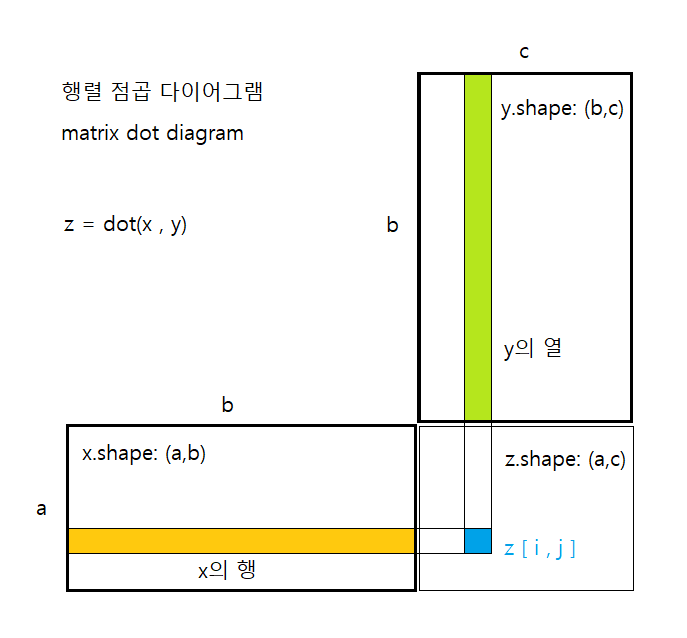

## 4. 텐서 크기 변환 (tensor reshaping)

tenor를 reshape한다는 것은 특정 크기에 맞게 열과 행을 재배열한다는 뜻이다.

신경망에 주입할 숫자 데이터를 전처리할 때 사용할 수 있다.
```
train_images = train_images.reshape((60000, 28*28))
```
당연히 크기가 변환된 텐서와 원래 텐서는 원소 개수가 동일하다. 

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
print(x.shape)

(3, 2)


In [ ]:
x = x.reshape((6,1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = x.reshape((2,3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

자주 사용하는 특별한 크기 변환은 **전치(trainsposition)**이다. 

행렬의 전치는 행과 열을 바꾸는 것을 의미한다. (즉 x[i, :]의 전치는 x[:, i]가 된다)

In [ ]:
x = np.zeros((300,20))
x = np.transpose(x)
print(x.shape)

(20, 300)


In [ ]:
x = x.T
x.shape

(300, 20)

## 5. 텐서 연산의 기하학적 해석

텐서 연산이 조작하는 텐서의 내용은 어떤 기하학적 공간에 있는 좌표 포인트로 해석 될 수 있기 때문에 모든 텐서 연산은 기하학적 해석이 가능하다.

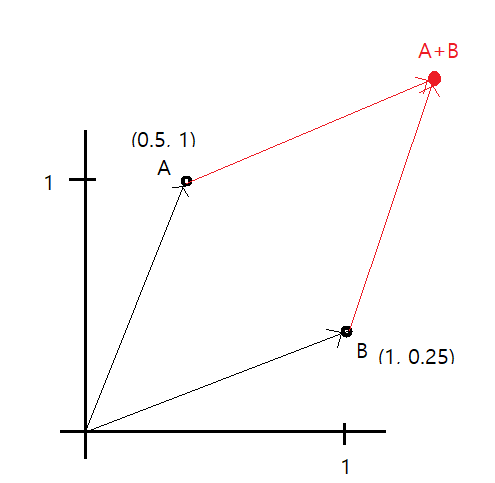

일반적으로 아핀 변환(affine transformation), 회전, 스케일링(scaling) 등처럼 기본적인 기하학적 연산은 텐서 연산으로 표현될 수 있다.

예를 들어 theta 각도로 2D 벡터를 회전하는 것은 2X2 행렬 R=[u,v]를 점곱해 구현할 수 있다. u와 v는 동일 평면상의 벡터이다.
- u = [cos(theta), sin(theta)]
- v = [-sin(theta), cos(theta)]

*affine transformation : 점, 직선, 평면을 보존하는 아핀 공간으로의 변환. 이 변환은 거리의 비율과 직선의 평행을 유지하는 이동, 스케일링, 회전 등이 포함된다.

## 6. 딥러닝의 기하학적 해석

하나는 빨간색이고 다른 하나는 파란색인 2개의 색종이 두개를 뭉쳐 작은 공으로 만들었다고 상상해보자.

이 종이 공은 입력 데이터이고 색종이는 분류 문제의 데이터 클래스가 된다.

신경망(또는 다른 머신러닝 알고리즘)이 해야 할 일은 종이 공을 펼쳐서 두 클래스가 다시 깔끔하게 분리되는 변환을 찾는 것이다. 손가락으로 종이 공을 조금씩 펼치는 것처럼 딥러닝을 사용해 3D 공간에서 간단한 변환들을 연결해 이를 구현한다.

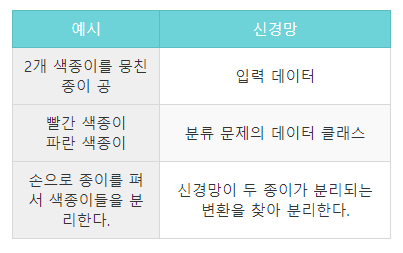

위 예시의 종이 공을 펼치는 것이 머신 러닝이 하는 일이다. 

(즉, 복잡하고 심하게 꼬여 있는 데이터의 매니폴드에 대한 깔끔한 표현을 찾는 일.)



**딥러닝의 심층 네트워크의 각 층은 데이터를 조금씩 풀어 주는 변환을 적용하므로, 이런 층을 깊게 쌓으면 아주 복잡한 분해 과정을 처리할 수 있다.**